In [1]:
from pyforest import *

In [2]:
train_data= pd.read_csv("F:/Data Science/ML/Project/HousePrice/Predicting-House-Prices-In-Bengaluru-Train-Data.csv",
                        header= [0])

In [3]:
test_data= pd.read_csv("F:/Data Science/ML/Project/HousePrice/Predicting-House-Prices-In-Bengaluru-Test-Data.csv",
                        header= [0])

In [4]:
train_data.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [5]:
test_data.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN


# Data Exploration

In [6]:
print( "The information of training dataset \n")
train_data.info() #find the general information

The information of training dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.6+ KB


In [7]:
print( "The information of testing dataset \n")
test_data.info() #find the general information

The information of testing dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
area_type       1480 non-null object
availability    1480 non-null object
location        1480 non-null object
size            1478 non-null object
society         854 non-null object
total_sqft      1480 non-null object
bath            1473 non-null float64
balcony         1411 non-null float64
price           0 non-null float64
dtypes: float64(3), object(6)
memory usage: 104.1+ KB


In [8]:
print("The data types of the attributes of train data:")
train_data.dtypes

The data types of the attributes of train data:


area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [9]:
print("The data types of the attributes of test data:")
test_data.dtypes

The data types of the attributes of test data:


area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [10]:
print(" The percentage of missing data in each attribute of training data:")
data_misn= train_data.isnull().sum()/ len(train_data)* 100
print( data_misn )
data_misn.plot.barh(figsize= (15, 5), title= "Percentage of Missing Values in training data")
plt.show()

 The percentage of missing data in each attribute of training data:
area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64


<Figure size 1500x500 with 1 Axes>

It can be seen that society column has the maximum number of missing values, and it crosses the standard limit of 30%. Let us plot to see the trend of price against society.
It can be due to:
* Many houses don't belong to any society.
* Data gathering problem
* Or both

 The percentage of missing data in each attribute of test data:
area_type         0.000000
availability      0.000000
location          0.000000
size              0.135135
society          42.297297
total_sqft        0.000000
bath              0.472973
balcony           4.662162
price           100.000000
dtype: float64


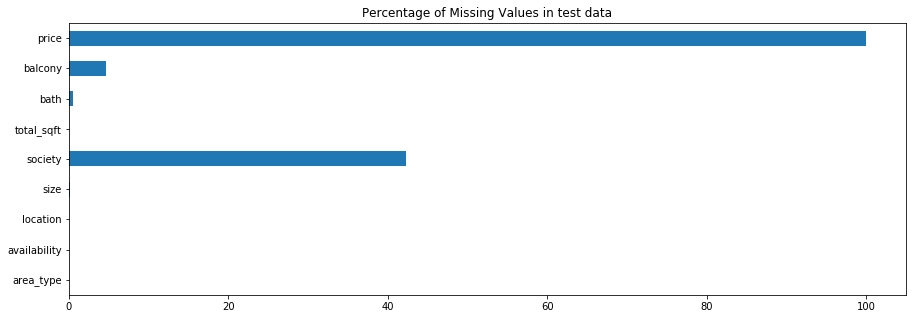

In [11]:
print(" The percentage of missing data in each attribute of test data:")
data_misn_test= test_data.isnull().sum()/ len(test_data)* 100
print( data_misn_test )
data_misn_test.plot.barh(figsize= (15, 5), title= "Percentage of Missing Values in test data")
plt.show()

It can be seen that society column has the maximum number of missing values in test data also, and it crosses the standard limit of 30%.
It can be due to:
* Many houses don't belong to any society.
* Data gathering problem
* Or both

Also, the target variable, as expected, has all values missing.

C:\Users\Soorma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


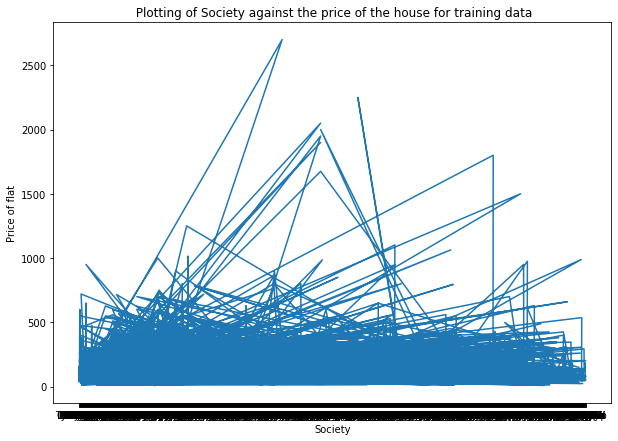

In [12]:
# Plotting the society variable against price for training data
soc_price_data= train_data[["society", "price"]]
soc_price_data.dropna(axis= 0, inplace= True)
fig= plt.subplots(figsize= (10, 7))
plt.plot(soc_price_data.society, soc_price_data.price)
plt.xlabel("Society")
plt.ylabel("Price of flat")
plt.title(" Plotting of Society against the price of the house for training data")
plt.show()

Thus, there is no apparent relation between the society and price of flat. Hence, we can remove the society attribute. 

In [13]:
# This is to see the aggregated value of society against price
#train_data.groupby('society')['price'].sum()

In [14]:
# Removing society attribute
# Note that, it has already been saved in another dataframe
train_data.drop(["society"], axis= 1, inplace= True)
train_data.head(4)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00


In [15]:
train_data.isnull().sum()/len(train_data)

area_type       0.000000
availability    0.000000
location        0.000075
size            0.001201
total_sqft      0.000000
bath            0.005480
balcony         0.045721
price           0.000000
dtype: float64

In [16]:
# Removing society attribute to another dataframe
soc_price_test= test_data[["society", "price"]]
# Note that, it has already been saved in another dataframe
test_data.drop(["society"], axis= 1, inplace= True)
test_data.head(4)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,1322,3.0,1.0,NaN


In [17]:
test_data.isnull().sum()/len(test_data)

area_type       0.000000
availability    0.000000
location        0.000000
size            0.001351
total_sqft      0.000000
bath            0.004730
balcony         0.046622
price           1.000000
dtype: float64

From above, we can see that the null values in different columns are less than cutoff. So , we can remove those null values now.

In [18]:
train_data.dropna(axis= 0, inplace= True)
print(" The null value count in train data: \n", train_data.isnull().sum() ) #to check that the null values are removed

test_data.drop(['price'], axis= 1, inplace= True)
test_data.dropna(axis= 0, inplace= True)
print(" The null value count in test data: \n", test_data.isnull().sum() )#to check that the null values are removed

 The null value count in train data: 
 area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64
 The null value count in test data: 
 area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
dtype: int64


For model better fit, we can later see if we can impute the missing values and get better accuracy.

In [19]:
# Converting strings in dataframe to lowercase
conv_cols= ['area_type', 'availability', 'location', 'size']
train_data[conv_cols]= train_data[conv_cols].apply(lambda x: x.astype(str).str.lower())
train_data.head() 

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,super built-up area,19-dec,electronic city phase ii,2 bhk,1056,2.0,1.0,39.07
1,plot area,ready to move,chikka tirupathi,4 bedroom,2600,5.0,3.0,120.00
2,built-up area,ready to move,uttarahalli,3 bhk,1440,2.0,3.0,62.00
3,super built-up area,ready to move,lingadheeranahalli,3 bhk,1521,3.0,1.0,95.00
4,super built-up area,ready to move,kothanur,2 bhk,1200,2.0,1.0,51.00


In [20]:
test_data[conv_cols]= test_data[conv_cols].apply(lambda x: x.astype(str).str.lower())
test_data.head()

,area_type,availability,location,size,total_sqft,bath,balcony
0,super built-up area,ready to move,brookefield,2 bhk,1225,2.0,2.0
1,plot area,ready to move,akshaya nagar,9 bedroom,2400,9.0,2.0
2,plot area,18-apr,hennur road,4 bedroom,1650,5.0,2.0
3,super built-up area,ready to move,kodichikkanahalli,3 bhk,1322,3.0,1.0
4,super built-up area,ready to move,konanakunte,2 bhk,1161,2.0,1.0


In [21]:
print( "The shape of the training data, after removing missing values: ", train_data.shape)
print( "The shape of the test data, after removing missing values: ", test_data.shape)

The shape of the training data, after removing missing values:  (12710, 8)
The shape of the test data, after removing missing values:  (1411, 7)


### Separating out the predictor and predicted variables of the dataset

In [22]:
Y_train= train_data.price
X_train= train_data.iloc[:, :-1 ]

In [23]:
X_test= test_data.iloc[:, :]

## Pricing trend

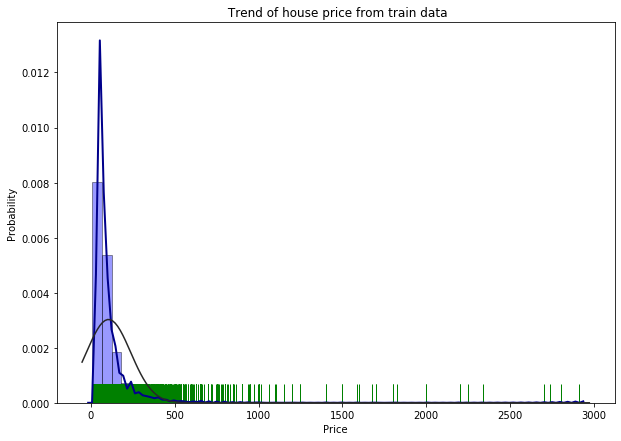

In [24]:
import seaborn as sns
from scipy import stats
fig, ax= plt.subplots(figsize= (10, 7))
sns.distplot(Y_train, color= 'blue', fit= stats.norm, kde= True, rug= True, hist_kws= {'edgecolor': 'black'},
           kde_kws= {'color': 'darkblue', 'linewidth': 2}, rug_kws= {'color': 'green'})
plt.title(" Trend of house price from train data")
plt.xlabel('Price')
plt.ylabel('Probability')
plt.show()

From the above plot, we see that:
* The house pricing is right-skewed, when compared to the standard normal distribution
* There are outliers in the dataset
* The price of house is mostly below 500lakhs.

So, for outliers, let us use a boxplot to find the trend.

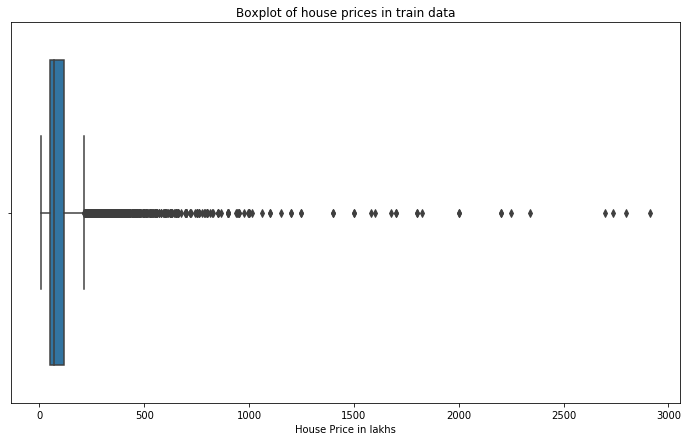

In [25]:
fig, ax= plt.subplots(figsize= (12, 7))
sns.boxplot(Y_train, ax= ax)
ax.set(xlabel= "House Price in lakhs", title= "Boxplot of house prices in train data")
plt.show()

Thus, we see that there are quite a few outliers in the price data, which are above the quartile range.

In [26]:
print(" Descriptive statistics of price:\n")
print( Y_train.describe() )
print("Mode of price data: ",Y_train.mode() )

 Descriptive statistics of price:

count    12710.000000
mean       106.060778
std        131.766089
min          8.000000
25%         49.030000
50%         70.000000
75%        115.000000
max       2912.000000
Name: price, dtype: float64
Mode of price data:  0    75.0
dtype: float64


So, for the target variable price, we can say that:
* The average house price is 106lakhs. But this average is affected by outliers.
* The data is skewed, with a high standard deviation of 131.7lakhs.
* The range of price is [8, 2912] lakhs.
* There is outliers in the data, which is above the price 213.95lakhs.

## Pre-processing the predictor variables

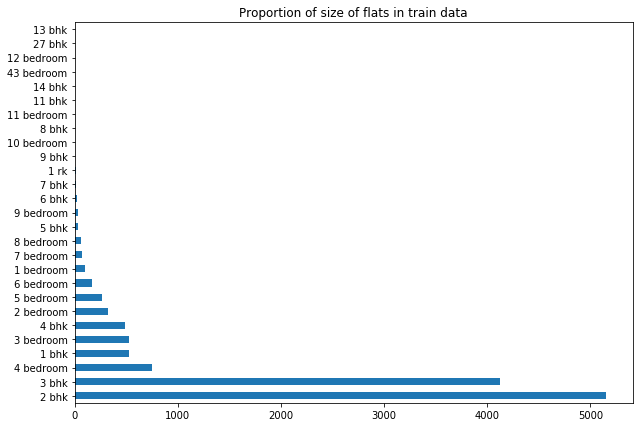

In [27]:
X_train['size'].value_counts().plot.barh(figsize= (10, 7), title= 'Proportion of size of flats in train data')
plt.show()

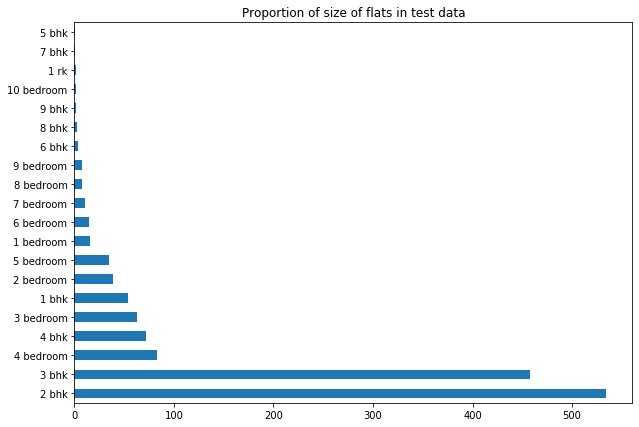

In [28]:
X_test['size'].value_counts().plot.barh(figsize= (10, 7), title= 'Proportion of size of flats in test data')
plt.show()

In [29]:
print( " To check th different types of values in total_sqft attribute in train data:")
X_train.total_sqft.value_counts()

 To check th different types of values in total_sqft attribute in train data:


1200             788
1100             218
1500             198
2400             177
600              172
1000             170
1350             130
1050             122
1300             115
1250             110
900              108
1400             105
1600              99
1800              98
1150              98
1140              91
2000              78
1450              69
1075              66
1650              63
800               62
1020              62
1160              60
1125              60
3000              60
1550              59
1180              58
2500              57
950               57
1255              56
                ... 
302                1
981                1
4356               1
1637               1
4640               1
1687               1
1879               1
2150 - 2225        1
1087               1
2826               1
906                1
1648               1
3569               1
2274.24            1
3463               1
804.1              1
3734         

From above, we see that total_sqft attribute has values in different types of measures as sq. yards. So we need to convert all to sqft. And hence, this will lead to the attribute being converted to integer.

In [30]:
# Funtion to take each value of total_sqft and convert it accordingly.
def total_sqft_convert(area_val):
    if len(area_val) == 1:
        
        try:
            return float(area_val[0])
        except:
            strings = ['Sq. Meter', 'Sq. Yards', 'Perch', 'Acres', 'Cents', 'Guntha', 'Grounds']
            split_list = re.split('(\d*.*\d)', area_val[0])[1:]
            area = float(split_list[0])
            type_of_area = split_list[1]
            
            if type_of_area == 'Sq. Meter':
                area_in_sqft = area * 10.7639
            elif type_of_area == 'Sq. Yards':
                area_in_sqft = area * 9.0
            elif type_of_area == 'Perch':
                area_in_sqft = area * 272.25
            elif type_of_area == 'Acres':
                area_in_sqft = area * 43560.0
            elif type_of_area == 'Cents':
                area_in_sqft = area * 435.61545
            elif type_of_area == 'Guntha':
                area_in_sqft = area * 1089.0
            elif type_of_area == 'Grounds':
                area_in_sqft = area * 2400.0
            return float(area_in_sqft)        
    else:
        return (float(area_val[0]) + float(area_val[1]))/2.0    

In [31]:
 #converting to sqft
X_train.total_sqft= X_train.total_sqft.str.split('-').apply(total_sqft_convert)

In [32]:
#X_test.total_sqft.value_counts()

In [33]:
X_test.total_sqft= X_test.total_sqft.str.split('-').apply(total_sqft_convert)

In [34]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [35]:
X_train.head(3)

,area_type,availability,location,size,total_sqft,bath,balcony
0,super built-up area,19-dec,electronic city phase ii,2 bhk,1056.0,2.0,1.0
1,plot area,ready to move,chikka tirupathi,4 bedroom,2600.0,5.0,3.0
2,built-up area,ready to move,uttarahalli,3 bhk,1440.0,2.0,3.0


So, from above, we see that the attributes 'area_type', 'location', 'size' are categorical variables. These need to be encoded to numbers.

In [36]:
X_train.area_type= le.fit_transform(X_train.area_type)
X_train.location= le.fit_transform(X_train.location)
X_train['size']= le.fit_transform(X_train['size'])
#X_train.availability= le.fit_transform(X_train.availability)

In [37]:
X_test.area_type= le.fit_transform(X_test.area_type)
X_test.location= le.fit_transform(X_test.location)
X_test['size']= le.fit_transform(X_test['size'])
#X_train.availability= le.fit_transform(X_train.availability)

In [38]:
# Encoded attributes
X_train.head(4)

,area_type,availability,location,size,total_sqft,bath,balcony
0,3,19-dec,415,10,1056.0,2.0,1.0
1,2,ready to move,309,14,2600.0,5.0,3.0
2,0,ready to move,1164,13,1440.0,2.0,3.0
3,3,ready to move,750,13,1521.0,3.0,1.0


"Immediate Possession' got removed when NA rows were removed from data. So that we need to handle. Hence, we should not drop NA columns. To be done later.

In [39]:
X_test.head(4)

,area_type,availability,location,size,total_sqft,bath,balcony
0,3,ready to move,89,5,1225.0,2.0,2.0
1,2,ready to move,29,18,2400.0,9.0,2.0
2,2,18-apr,178,8,1650.0,5.0,2.0
3,3,ready to move,257,7,1322.0,3.0,1.0


In [40]:
# Categorising 'avilability' as "Ready to move" and "Others"
def avail_conv(avl):
    if( avl== 'ready to move'):
        return 0
    elif(avl== 'immediate possession'):
        return 1
    else:
        return 2

In [41]:
X_train.availability= X_train.availability.apply(avail_conv)
X_test.availability= X_test.availability.apply(avail_conv)

In [42]:
print( X_train.head(4) )
print( X_train.dtypes)

   area_type  availability  location  size  total_sqft  bath  balcony
0          3             2       415    10      1056.0   2.0      1.0
1          2             0       309    14      2600.0   5.0      3.0
2          0             0      1164    13      1440.0   2.0      3.0
3          3             0       750    13      1521.0   3.0      1.0
area_type         int32
availability      int64
location          int32
size              int32
total_sqft      float64
bath            float64
balcony         float64
dtype: object


In [43]:
print( X_test.head(4) )
print( X_test.dtypes)

   area_type  availability  location  size  total_sqft  bath  balcony
0          3             0        89     5      1225.0   2.0      2.0
1          2             0        29    18      2400.0   9.0      2.0
2          2             2       178     8      1650.0   5.0      2.0
3          3             0       257     7      1322.0   3.0      1.0
area_type         int32
availability      int64
location          int32
size              int32
total_sqft      float64
bath            float64
balcony         float64
dtype: object


In [44]:
X_test.availability.unique()

array([0, 2], dtype=int64)

## Modelling 

In [45]:
from xgboost import XGBRegressor
regr= XGBRegressor()

### Splitting the test data to check for accuracy

In [46]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr,y_val= train_test_split(X_train, Y_train, test_size= 0.1, random_state= 111 )

In [66]:
x_tr.head()

,area_type,availability,location,size,total_sqft,bath,balcony
4077,3,0,579,13,1570.0,3.0,2.0
7366,2,0,463,14,2500.0,3.0,2.0
9468,3,0,427,13,1485.0,2.0,3.0
12450,3,0,750,13,1894.0,4.0,1.0
11785,3,2,1253,13,1692.0,3.0,3.0


In [47]:
print(x_tr.shape)
print(x_val.shape)
print(y_tr.shape)
print(y_val.shape)

(11439, 7)
(1271, 7)
(11439,)
(1271,)


In [48]:
# Fitting the regressor with data
regr.fit(x_tr, y_tr)

C:\Users\Soorma\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:18:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [49]:
def errcalc(y_pred, y_act):
    err= np.square(np.log10(y_pred+ 1 )- np.log10(y_act+ 1)).mean()** 0.5
    acc= 1- err
    return(acc)

In [50]:
# Predicting prices
y_pred_tr= regr.predict(x_val)

In [51]:
print(" The accuracy(RMLSE) score of the train dataset: ", errcalc(y_pred_tr, y_val) )

 The accuracy(RMLSE) score of the train dataset:  0.8383255916862395


C:\Users\Soorma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


### Now fitting the model for the whole train data set

In [52]:
regr.fit(X_train, Y_train)

C:\Users\Soorma\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[22:18:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [53]:
Y_pred_train= regr.predict(X_train)

In [54]:
print(" The accuracy(RMLSE) score of the train dataset: ", errcalc(Y_pred_train, Y_train) )

 The accuracy(RMLSE) score of the train dataset:  0.8442074044451928


In [55]:
Y_pred_test= regr.predict(X_test)

In [56]:
(pd.DataFrame(Y_pred_test, columns= ["price"]) ).to_excel("F:/Data Science/ML/Project/HousePrice/Price_Submsn.xlsx",
                                                        index= False)

# Writing the model as pickle file

In [64]:
import pickle

In [65]:
#serializing our model to a file called model.pkl
pickle.dump(regr, open(r"F:\Data Science\DE\xgb-model.pkl","wb"))